<center><h1>GAM Assignment-1</h1></center>

<center><h4>Soumyadipta Maiti (2021sc04237@wilp.bits-pilani.ac.in)</h4></center> 

<h3>Problem Statement</h3>

__A. Generate random graphs of at least 100 node connected graphs and perform the following network measurement:<br>
B. Perform Following activity on graph:<br>
&emsp; 1.Eccentricity, Diameter<br>
&emsp; 2. Radius<br>
&emsp; 3. Centrality : Degree Centrality, EigenVector Centrality, katz centrality, Page Rank <br>
&emsp; 4. Perform exploratory analysis of various centralities calculated in step-3 & explain variation in centrality behavior <br>
&emsp; 5. Calculate betweenness and closeness centrality and explain the physical significance <br>
&emsp; 6. Draw the Ego-graph of various nodes found in above analysis <br>
&emsp; 7. Calculate the Global clustering coefficient of random graph <br>
&emsp; 8. Calculate the Local clustering coefficient of nodes of Random graph <br>
&emsp; 9. Identify the highest local clustering coefficient and their significance in terms of structural behavior <br>__

# Table of Contents

A. [Random Connected Graph Generation](#A.-Random-Connected-Graph-Generation)<br>
B. [Network Measurement on Graph](#B.-Network-Measurement-on-graph)<br>
&nbsp;&nbsp;&nbsp;&nbsp;B.1 [Eccentricity & Diameter](#B.1-Eccentricity,-Diameter)<br>
&nbsp;&nbsp;&nbsp;&nbsp;B.2 [Radius](#B.2-Radius)<br>
&nbsp;&nbsp;&nbsp;&nbsp;B.3 [Centrality](#B.3-Graph-Centrality)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;B.3.1 [Degree Centrality](#B.3.1-Degree-Centrality)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;B.3.2 [EigenVector Centrality](#B.3.2-EigenVector-Centrality)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;B.3.3 [Katz Centrality](#B.3.3-Katz-Centrality)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;B.3.4 [Page Rank](#B.3.4-Page-Rank)<br>
&nbsp;&nbsp;&nbsp;&nbsp;B.4 [Exploratory Analysis of Centralities](#B.4-Exploratory-Analysis-of-Centralities)<br>
&nbsp;&nbsp;&nbsp;&nbsp;B.5 [Betweenness and Closeness Centrality](#B.5-Betweenness-and-Closeness-Centrality)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;B.5.1 [Betweenness Centrality](#B.5.1-Betweenness-Centrality)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;B.5.2 [Closeness Centrality](#B.5.2-Closeness-Centrality)<br>
&nbsp;&nbsp;&nbsp;&nbsp;B.6 [Drawing of Ego-graph](#B.6-Drawing-of-Ego-graph)<br>
&nbsp;&nbsp;&nbsp;&nbsp;B.7 [Global Clustering Coefficient](#B.7-Global-Clustering-Coefficient)<br>
&nbsp;&nbsp;&nbsp;&nbsp;B.8 [Local Clustering Coefficient](#B.8-Local-Clustering-Coefficient)<br>
&nbsp;&nbsp;&nbsp;&nbsp;B.9 [Highest Local Clustering Coefficients](#B.9-Highest-Local-Clustering-Coefficients)<br>

<h4>Import of Required Libraries</h4>

In [85]:
#for Graph Modelling
import networkx as nx
import random

#for plotting of Graphs
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

<h2>A. Random Connected Graph Generation</h2>

Generate random graphs of at least 100 node connected graphs.

__Random Graphs__ are mathematical structures that model random connections between nodes or vertices. They are widely studied in graph theory & have applications in various fields, including computer science, social networks, and biology. <br>

Below are few popular models for generating random graphs:
1. Erdős-Rényi model (also known as the random graph model)
2. Barabási-Albert model
3. Watts-Strogatz model
4. Random geometric graph

<h4>Generation of Random Connected Graph using simple networkx.Graph() followed by random edge generation</h4> 

In [86]:
def generate_random_connected_graph(num_nodes, num_edges):
    grph = nx.Graph()
    grph.add_nodes_from(range(num_nodes))
    
    while nx.number_of_edges(grph) < num_edges:
        node1 = random.randint(0, num_nodes - 1)
        node2 = random.randint(0, num_nodes - 1)
        
        if node1 != node2 and not grph.has_edge(node1, node2):
            grph.add_edge(node1, node2)
            
    # Extract largest connected component
    largest_component = max(nx.connected_components(grph), key=len)
    grph = grph.subgraph(largest_component)
            
    return grph

In [87]:
# Generate a random connected graph
G = generate_random_connected_graph(num_nodes=150, num_edges=300)

Below are some alternative methods for Random Graph generation via API calls:
- Random Regular Graph
- connected_watts_strogatz_graph
- Erdős-Rényi graph

In [88]:
# Random Regular Graph
G_rand_reg = nx.random_regular_graph(d=4, n=150, seed=42)

In [89]:
# connected_watts_strogatz_graph
G_watts_strogatz = nx.connected_watts_strogatz_graph(n=150, k=2, p=0.3, seed=42)

In [90]:
# Generate a random connected graph using Erdős-Rényi model

G_erdos_renyi = nx.erdos_renyi_graph(n=120, p=0.2)

# Ensure the graph is connected
if not nx.is_connected(G_erdos_renyi):
    G_erdos_renyi = max(nx.connected_components(G_erdos_renyi), key=len)
    G_erdos_renyi = G_erdos_renyi.subgraph(G_erdos_renyi)

<h4>Drawing of Graph</h4>

In [91]:
def draw_graph(G, width=10, height=5):
    fig = plt.figure(figsize=(width,height))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=150, node_color='lightblue', edge_color='gray')
    plt.title("Random Connected Graph")
    plt.show()

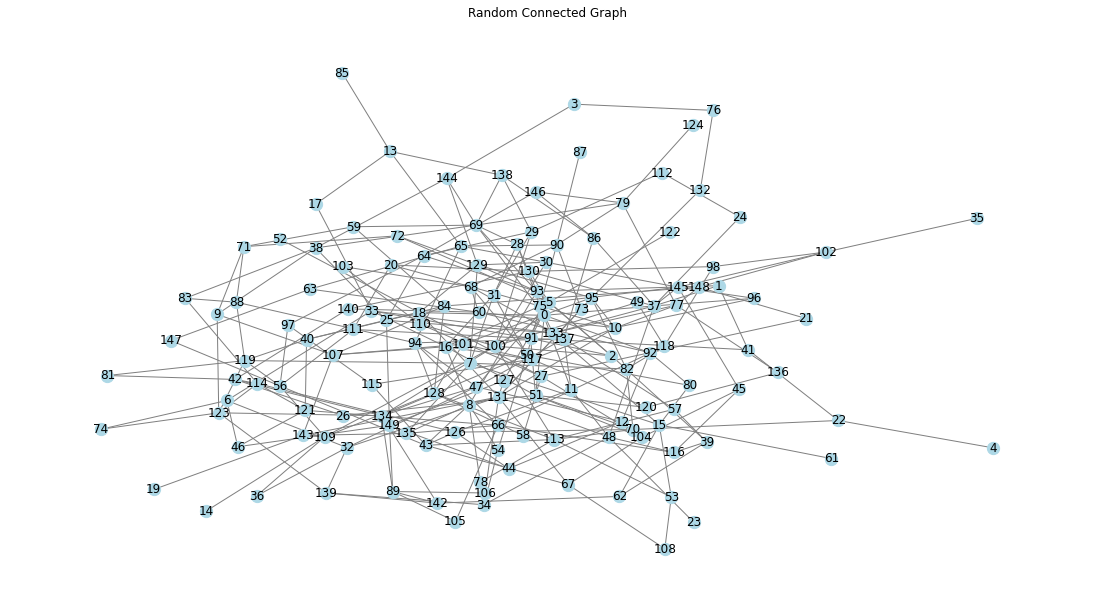

In [92]:
# Visualize the graph

draw_graph(G, 15, 8)
# draw_graph(G_rand_reg, 15, 8)
# draw_graph(G_watts_strogatz, 15, 8)
# draw_graph(G_erdos_renyi, 15, 8)

<h2>B. Network Measurement on graph</h2>

Perform Following activities (Network Measurements) on above graph:

<h3>B.1 Eccentricity, Diameter</h3>

<h4>Eccentricity</h4>
Eccentricity of a vertex in a graph is maximum distance (number of edges) between that vertex and any other vertex in the graph.
It measures how far vertex is from the farthest vertex in the graph.

In [93]:
ecentricity = nx.eccentricity(G)

In [94]:
# len(ecentricity)
ecentricity_sorted = sorted(ecentricity.items(), key=lambda X: X[1], reverse=True)
for node, ecen in ecentricity_sorted:
    print(f'Ecentricity of Node {node} is : {ecen}')

Ecentricity of Node 4 is : 8
Ecentricity of Node 87 is : 8
Ecentricity of Node 3 is : 7
Ecentricity of Node 19 is : 7
Ecentricity of Node 22 is : 7
Ecentricity of Node 35 is : 7
Ecentricity of Node 63 is : 7
Ecentricity of Node 74 is : 7
Ecentricity of Node 76 is : 7
Ecentricity of Node 85 is : 7
Ecentricity of Node 90 is : 7
Ecentricity of Node 108 is : 7
Ecentricity of Node 111 is : 7
Ecentricity of Node 124 is : 7
Ecentricity of Node 132 is : 7
Ecentricity of Node 6 is : 6
Ecentricity of Node 9 is : 6
Ecentricity of Node 12 is : 6
Ecentricity of Node 13 is : 6
Ecentricity of Node 14 is : 6
Ecentricity of Node 17 is : 6
Ecentricity of Node 20 is : 6
Ecentricity of Node 21 is : 6
Ecentricity of Node 23 is : 6
Ecentricity of Node 24 is : 6
Ecentricity of Node 25 is : 6
Ecentricity of Node 26 is : 6
Ecentricity of Node 27 is : 6
Ecentricity of Node 28 is : 6
Ecentricity of Node 29 is : 6
Ecentricity of Node 30 is : 6
Ecentricity of Node 32 is : 6
Ecentricity of Node 33 is : 6
Ecentricit

<h4>Diameter</h4>

Diameter of a graph is maximum eccentricity among all the vertices in the graph. It's the longest shortest path between any two vertices of graph.

In [95]:
diameter = nx.diameter(G)

In [96]:
print(f'Diameter of above Graph G is : {diameter}')

Diameter of above Graph G is : 8


<h3>B.2 Radius</h3>
Radius of a graph is a measure of its "centeredness" or how close its vertices are to each other. It represents minimum eccentricity among all vertices in the graph. 

In [97]:
radius = nx.radius(G)
print(f'Radius of above Graph G is : {radius}')

Radius of above Graph G is : 4


<h3>B.3 Graph Centrality</h3>

Centrality measures in graph theory quantify importance or influence of nodes within a graph. There are several types of centrality measures commonly used, each capturing different aspects of node centrality. Here are a few popular centrality measures:

<h4>B.3.1 Degree Centrality</h4>
It measures number of edges connected to a node. Nodes with a higher degree centrality are considered more central in terms of their connectivity within the graph.

In [98]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

In [99]:
# Print centrality measures
degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda X: X[1], reverse=True)
for node, centrality in degree_centrality_sorted:
    print(f"Degree Centrality of Node {node}: {centrality}")

Degree Centrality of Node 131: 0.07586206896551724
Degree Centrality of Node 5: 0.06206896551724138
Degree Centrality of Node 37: 0.06206896551724138
Degree Centrality of Node 100: 0.06206896551724138
Degree Centrality of Node 69: 0.05517241379310345
Degree Centrality of Node 0: 0.04827586206896552
Degree Centrality of Node 8: 0.04827586206896552
Degree Centrality of Node 16: 0.04827586206896552
Degree Centrality of Node 51: 0.04827586206896552
Degree Centrality of Node 68: 0.04827586206896552
Degree Centrality of Node 93: 0.04827586206896552
Degree Centrality of Node 113: 0.04827586206896552
Degree Centrality of Node 129: 0.04827586206896552
Degree Centrality of Node 134: 0.04827586206896552
Degree Centrality of Node 7: 0.041379310344827586
Degree Centrality of Node 15: 0.041379310344827586
Degree Centrality of Node 18: 0.041379310344827586
Degree Centrality of Node 43: 0.041379310344827586
Degree Centrality of Node 47: 0.041379310344827586
Degree Centrality of Node 48: 0.041379310344

<h4>B.3.2 EigenVector Centrality</h4>

It measures influence of a node based on centrality of its neighboring nodes. Nodes with a higher eigenvector centrality are connected to other highly central nodes.

In [100]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

In [101]:
eigenvector_centrality_sorted = sorted(eigenvector_centrality.items(), key=lambda X: X[1], reverse=True)
for node, centrality in eigenvector_centrality_sorted:
    print(f"Eigenvector Centrality of Node {node}: {centrality}")

Eigenvector Centrality of Node 131: 0.22351683119813806
Eigenvector Centrality of Node 0: 0.19931608570199902
Eigenvector Centrality of Node 5: 0.19125702317305673
Eigenvector Centrality of Node 37: 0.18127003308612236
Eigenvector Centrality of Node 100: 0.1810159102758829
Eigenvector Centrality of Node 16: 0.17609186722069964
Eigenvector Centrality of Node 8: 0.17322622749476962
Eigenvector Centrality of Node 93: 0.16832831149106395
Eigenvector Centrality of Node 69: 0.15613131186209248
Eigenvector Centrality of Node 129: 0.1474420528865173
Eigenvector Centrality of Node 51: 0.14455798704055883
Eigenvector Centrality of Node 18: 0.1425637016065165
Eigenvector Centrality of Node 2: 0.14039896059937437
Eigenvector Centrality of Node 133: 0.13373557813611667
Eigenvector Centrality of Node 91: 0.12952608783177302
Eigenvector Centrality of Node 95: 0.12773994783858494
Eigenvector Centrality of Node 47: 0.1270059850574479
Eigenvector Centrality of Node 113: 0.12363251838110356
Eigenvector C

<h4>B.3.3 Katz Centrality</h4>

Katz Centrality measures centrality of a node by considering both its direct connections and the indirect influence it receives from neighboring nodes. It assigns higher centrality scores to nodes that have more connections and are connected to other highly central nodes. Centrality of a node in Katz Centrality is determined by sum of centralities of its neighbors, with an attenuation factor applied to account for influence of distant nodes.

In [102]:
# Calculation of Katz centrality
alpha = 0.1  # Damping factor for Katz centrality
katz_centrality = nx.katz_centrality(G, alpha=alpha)

In [103]:
katz_centrality_sorted = sorted(katz_centrality.items(), key=lambda X: X[1], reverse=True)
for node, centrality in katz_centrality_sorted:
    print(f"Katz Centrality of Node {node}: {centrality}")

Katz Centrality of Node 131: 0.1431225071170397
Katz Centrality of Node 100: 0.12684879987155892
Katz Centrality of Node 5: 0.12617323037246306
Katz Centrality of Node 37: 0.12527228032139537
Katz Centrality of Node 0: 0.12199621796310796
Katz Centrality of Node 69: 0.11665850979024373
Katz Centrality of Node 16: 0.11587867771741321
Katz Centrality of Node 8: 0.11428820151098387
Katz Centrality of Node 93: 0.1124713623057736
Katz Centrality of Node 134: 0.11013239598823153
Katz Centrality of Node 129: 0.10819857141266105
Katz Centrality of Node 51: 0.10818318531809037
Katz Centrality of Node 113: 0.10712037924669554
Katz Centrality of Node 47: 0.10376922039827026
Katz Centrality of Node 133: 0.10361205547664157
Katz Centrality of Node 18: 0.10352702860949202
Katz Centrality of Node 68: 0.10295756503265065
Katz Centrality of Node 95: 0.10093300326523151
Katz Centrality of Node 91: 0.10031749803776517
Katz Centrality of Node 145: 0.10003208251803247
Katz Centrality of Node 48: 0.09997527

<h4>B.3.4 Page Rank</h4>

PageRank is an algorithm used by search engines to rank web pages based on their importance. It measures Centrality of a web page by considering number and quality of incoming links to that page. In the context of graph theory, PageRank assigns higher centrality scores to nodes that have more inbound links from other highly central nodes. Centrality of a node in PageRank is determined by random walk probability of reaching that node through a random traversal of the graph.

In [104]:
# Calculation of PageRank
# pagerank = nx.pagerank(G)
pagerank = nx.pagerank_numpy(G, alpha=0.9)

In [105]:
pagerank_sorted = sorted(pagerank.items(), key=lambda X: X[1], reverse=True)
for node, centrality in pagerank_sorted:
    print(f"PageRank of Node {node}: {centrality}")

PageRank of Node 131: 0.01716492316142752
PageRank of Node 37: 0.014161109171969758
PageRank of Node 5: 0.014119668765262565
PageRank of Node 100: 0.01408978156793933
PageRank of Node 69: 0.012463114246771287
PageRank of Node 68: 0.011199121089336357
PageRank of Node 51: 0.011042773228582424
PageRank of Node 113: 0.011034329761050406
PageRank of Node 129: 0.011033222857267705
PageRank of Node 134: 0.010857863410575928
PageRank of Node 93: 0.010707429380563044
PageRank of Node 8: 0.010698661230720904
PageRank of Node 0: 0.01068450638171585
PageRank of Node 16: 0.010638336812448333
PageRank of Node 90: 0.010313981465013007
PageRank of Node 15: 0.010218205469813509
PageRank of Node 109: 0.010184960590589997
PageRank of Node 48: 0.009913162588214496
PageRank of Node 56: 0.009851077847780401
PageRank of Node 18: 0.009790202697457255
PageRank of Node 92: 0.009775449866895766
PageRank of Node 145: 0.009756405336000227
PageRank of Node 95: 0.009748086012049685
PageRank of Node 66: 0.0097227821

<h3>B.4 Exploratory Analysis of Centralities</h3>

Perform exploratory analysis of various centralities calculated in step-3 and explain the variation in centrality behavior

__Exploratory Analysis of various Centralities__

In below code, I performed exploratory analysis by plotting histograms of different centrality measures' distributions. This helps to visualize frequency distribution of centrality values across nodes in the graph.

By observing the histograms, I can analyze the variation in centrality behavior:

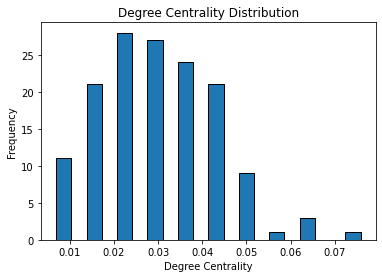

In [106]:
# Degree Centrality
degree_values = list(degree_centrality.values())
plt.hist(degree_values, bins=20, edgecolor='black')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution')
plt.show()

Degree Centrality: Histogram of degree centrality shows the frequency distribution of nodes with different degrees. It is observed that most common degree centrality values and the spread of degrees in the graph. If there are nodes with significantly higher degrees, it indicates the presence of hubs or highly connected nodes.

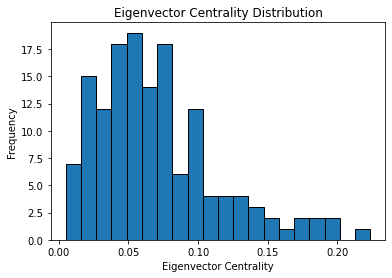

In [107]:
# Eigenvector Centrality
eigenvector_values = list(eigenvector_centrality.values())
plt.hist(eigenvector_values, bins=20, edgecolor='black')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality Distribution')
plt.show()

Eigenvector Centrality: The histogram of eigenvector centrality displays the frequency distribution of nodes with different eigenvector centrality values. Nodes with higher eigenvector centrality are connected to other influential nodes. If there is a long tail in the distribution, it suggests the presence of highly influential nodes.

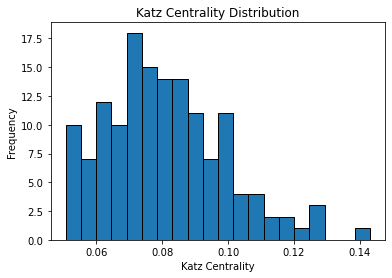

In [108]:
# Katz Centrality
katz_values = list(katz_centrality.values())
plt.hist(katz_values, bins=20, edgecolor='black')
plt.xlabel('Katz Centrality')
plt.ylabel('Frequency')
plt.title('Katz Centrality Distribution')
plt.show()

Katz Centrality: The histogram of Katz centrality shows the frequency distribution of nodes with different Katz centrality values. Varying the damping factor (alpha) can influence the centrality rankings. Observing the distribution helps identify nodes with high Katz centrality, indicating their importance in terms of direct and indirect connections.

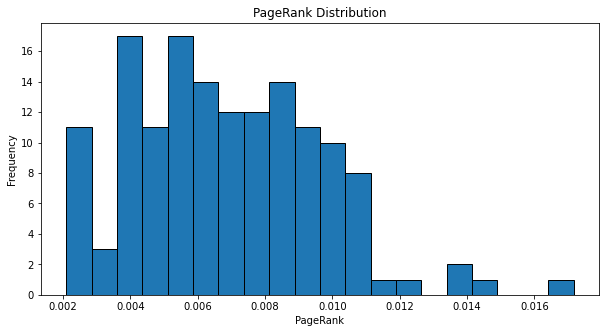

In [109]:
# PageRank
plt.figure(figsize=(10,5))
pagerank_values = list(pagerank.values())
plt.hist(pagerank_values, bins=20, edgecolor='black')
plt.xlabel('PageRank')
plt.ylabel('Frequency')
plt.title('PageRank Distribution')
plt.show()

PageRank: The histogram of PageRank displays the frequency distribution of nodes with different PageRank values. PageRank measures the importance of nodes based on the probability of reaching them through random walks. The distribution can indicate highly important nodes in the graph.

__Explanation of Variation in Centrality Behavior__

By examining these histograms, we can gain insights into variation in centrality behavior and identify nodes that play crucial roles in network. Additionally, we can further analyze relationship between different centrality measures or explore other graph properties to deepen understanding of graph's structure and importance.

The variation in centrality behavior arises due to the different perspectives and measures of importance or influence that each centrality metric focuses on. Each measure considers different aspects of the network structure and topology, leading to variations in the centrality rankings and behaviors of nodes.

e.g.-->, nodes with high degree centrality may not necessarily have high closeness or betweenness centrality. Similarly, nodes with high betweenness centrality may not have high degree centrality. Centrality measures take into account different characteristics of network, such as connectivity, distance, or flow of information, resulting in variations in centrality scores and rankings across different metrics.

Understanding these variations helps in gaining insights into different aspects of node importance and influence within a network and provides a more comprehensive understanding of network's structure and dynamics.

<h3>B.5 Betweenness and Closeness Centrality</h3>

Calculate betweenness and closeness centrality and explain the physical significance.

 <h4>B.5.1 Betweenness Centrality</h4>

In [110]:
# Calculation of betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

In [111]:
# Printing of  betweenness centrality
betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda X: X[1], reverse=True)
for node, centrality in betweenness_centrality_sorted:
    print(f"Betweenness Centrality of Node {node}: {centrality}")

Betweenness Centrality of Node 131: 0.09194443290593483
Betweenness Centrality of Node 100: 0.0814881418014017
Betweenness Centrality of Node 37: 0.06733202707403654
Betweenness Centrality of Node 0: 0.06431041949845406
Betweenness Centrality of Node 5: 0.061669804199296054
Betweenness Centrality of Node 69: 0.05481054908455182
Betweenness Centrality of Node 134: 0.05063056344172524
Betweenness Centrality of Node 133: 0.04487210432132321
Betweenness Centrality of Node 51: 0.04278410387839323
Betweenness Centrality of Node 16: 0.04270992438199568
Betweenness Centrality of Node 113: 0.04172656879578638
Betweenness Centrality of Node 95: 0.041226877546322
Betweenness Centrality of Node 48: 0.04096916224399083
Betweenness Centrality of Node 94: 0.04077416082402559
Betweenness Centrality of Node 90: 0.039294510206443964
Betweenness Centrality of Node 18: 0.03866918539811263
Betweenness Centrality of Node 145: 0.038439770456180036
Betweenness Centrality of Node 15: 0.03786068531673671
Betwee

Betweenness Centrality:<br>
Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the graph. It quantifies the influence or control that a node has over the flow of information or resources in the network. Nodes with high betweenness centrality act as bridges or bottlenecks, connecting different parts of the graph. They play a critical role in information dissemination, as they can control the flow between communities or act as gatekeepers in the network.

<h4>B.5.2 Closeness Centrality</h4>

In [112]:
# Calculation of  Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

In [113]:
# Printing of Closeness Centrality
closeness_centrality_sorted = sorted(closeness_centrality.items(), key=lambda X: X[1], reverse=True)
for node, centrality in closeness_centrality_sorted:
    print(f"Closeness Centrality of Node {node}: {centrality}")

Closeness Centrality of Node 0: 0.3589108910891089
Closeness Centrality of Node 100: 0.3493975903614458
Closeness Centrality of Node 131: 0.3419811320754717
Closeness Centrality of Node 16: 0.33642691415313225
Closeness Centrality of Node 37: 0.33642691415313225
Closeness Centrality of Node 5: 0.33564814814814814
Closeness Centrality of Node 8: 0.33256880733944955
Closeness Centrality of Node 18: 0.327313769751693
Closeness Centrality of Node 133: 0.327313769751693
Closeness Centrality of Node 93: 0.3251121076233184
Closeness Centrality of Node 47: 0.3243847874720358
Closeness Centrality of Node 2: 0.3215077605321508
Closeness Centrality of Node 51: 0.32079646017699115
Closeness Centrality of Node 69: 0.32079646017699115
Closeness Centrality of Node 134: 0.3200883002207506
Closeness Centrality of Node 94: 0.3172866520787746
Closeness Centrality of Node 48: 0.3159041394335512
Closeness Centrality of Node 113: 0.3159041394335512
Closeness Centrality of Node 129: 0.3159041394335512
Closen

Closeness Centrality:<br>
Closeness centrality measures how close a node is to all other nodes in terms of the shortest path distances. It quantifies the ease of reaching a node from any other node in the graph. Nodes with high closeness centrality are easily accessible and can efficiently spread information or influence throughout the network. They are important for efficient communication and are often located at the center or core of the network.

<h3>B.6 Drawing of Ego-graph</h3>

Draw the Ego-graph of various nodes found in above analysis 

In [114]:
# Draw ego-graphs for selected nodes

def graph_ego(nodes_ego, G):
    for node in nodes_ego:
        ego_graph = nx.ego_graph(G, node)

        # Plot the ego-graph
        plt.figure(figsize=(8, 5))
        pos = nx.spring_layout(ego_graph)
        nx.draw(ego_graph, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=8)
        plt.title(f"Ego-graph of Node {node}")
        plt.show()

<h4>Ego-Graph Ploting of highest 5 Nodes based on Degree Centrality</h4>

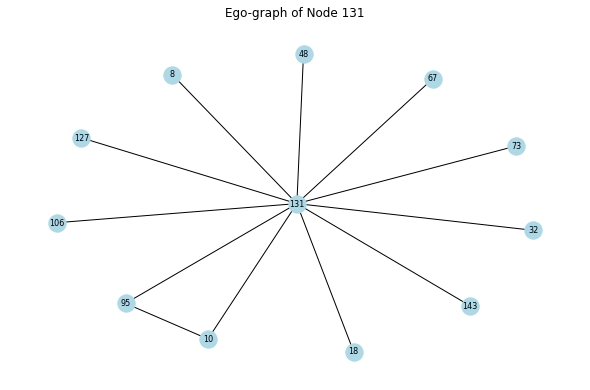

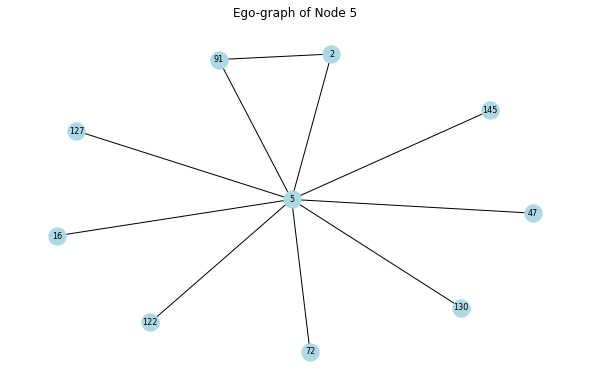

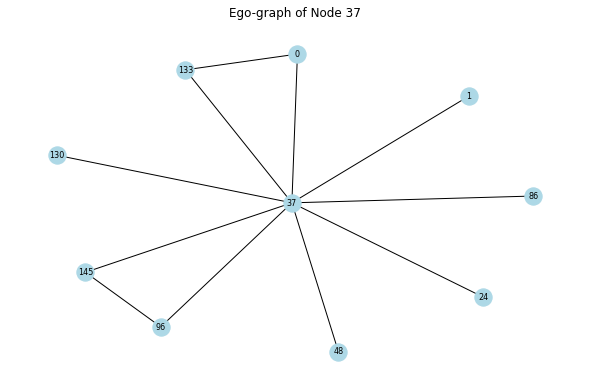

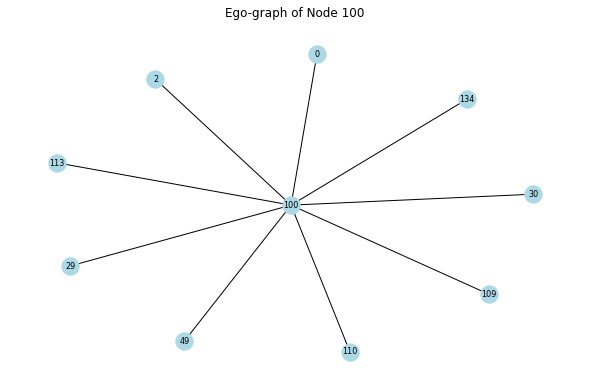

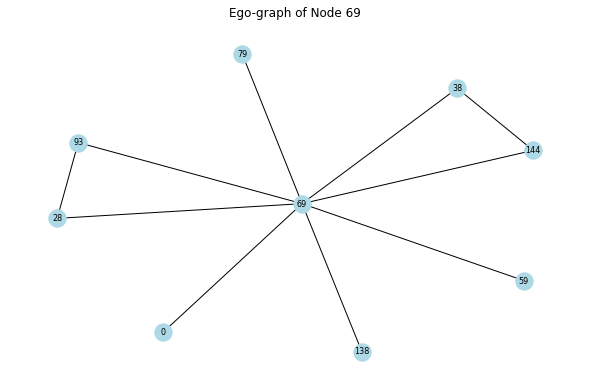

In [115]:
nodes_ego_degree_centrality = []
nodes_ego_degree_centrality = [row[0] for i, row in enumerate(degree_centrality_sorted) if i < 5]
graph_ego(nodes_ego_degree_centrality, G)

<h4>Ego-Graph Ploting of highest 5 Nodes based on Eigen-Vector Centrality</h4>

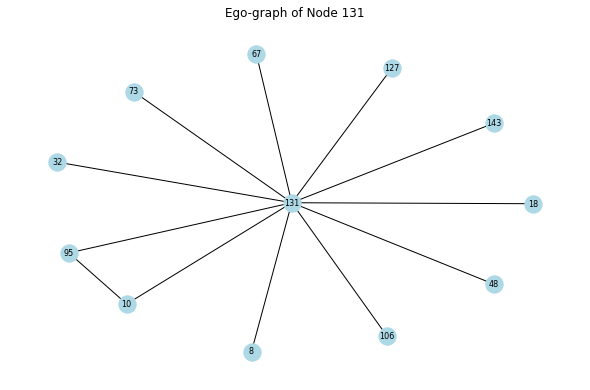

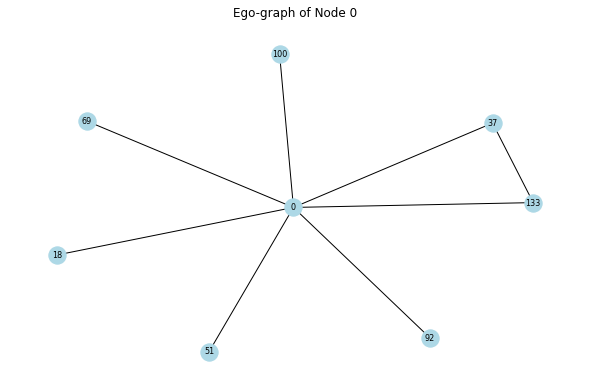

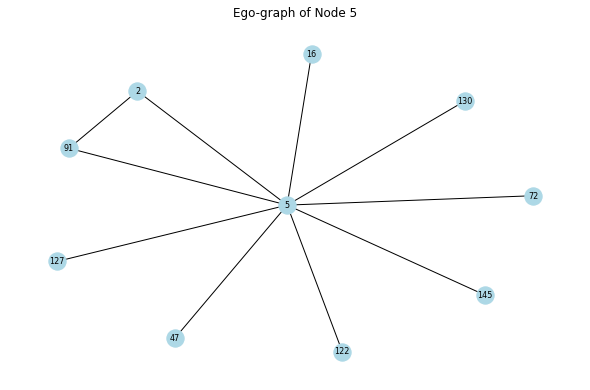

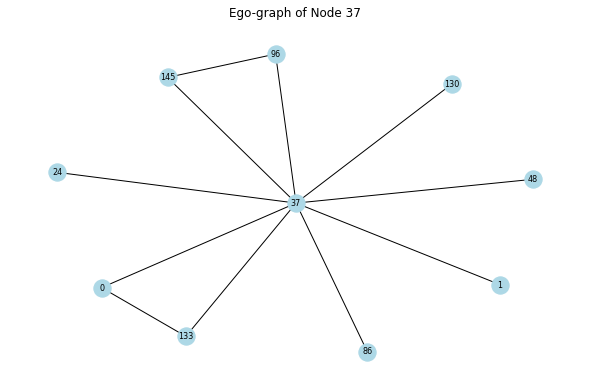

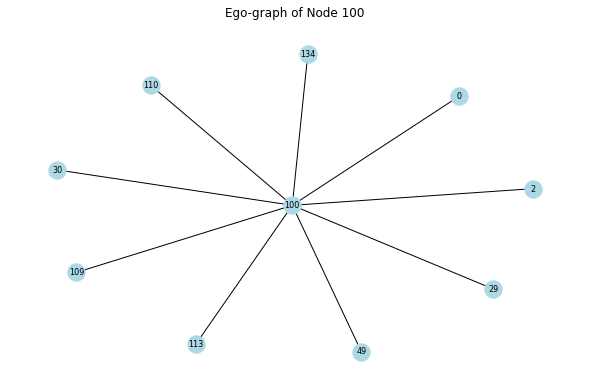

In [116]:
nodes_ego_eigenvector_centrality = []
nodes_ego_eigenvector_centrality = [row[0] for i, row in enumerate(eigenvector_centrality_sorted) if i < 5]
graph_ego(nodes_ego_eigenvector_centrality, G)

<h4>Ego-Graph Ploting of highest 5 Nodes based on Closeness Centrality</h4>

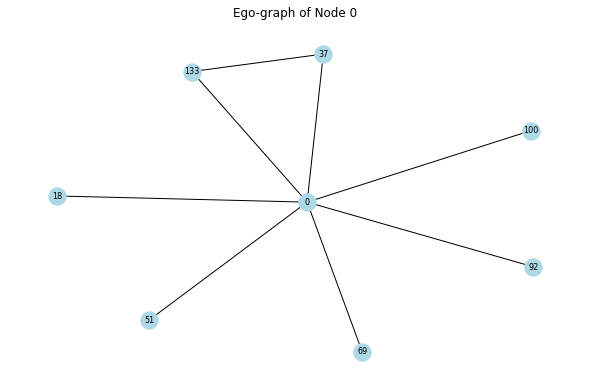

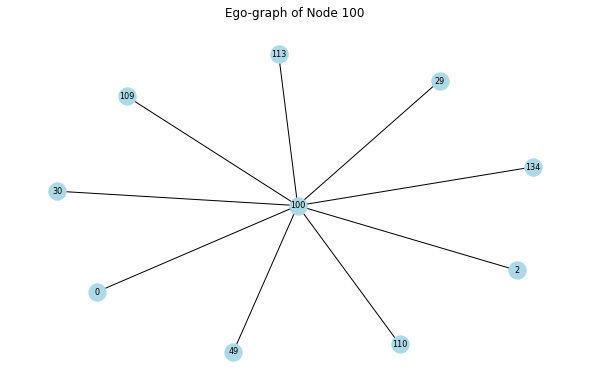

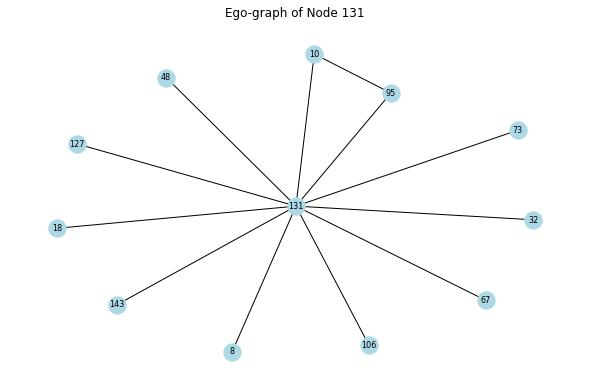

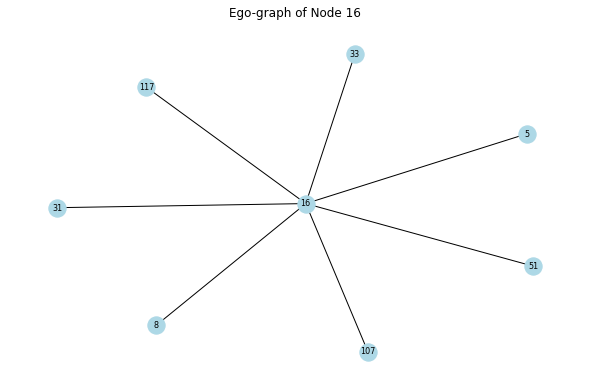

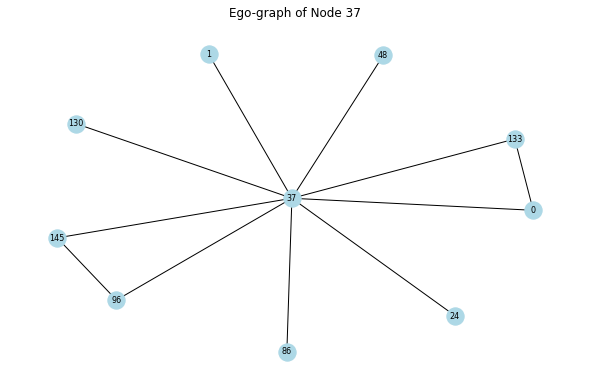

In [117]:
nodes_ego_closeness_centrality = []
nodes_ego_closeness_centrality = [row[0] for i, row in enumerate(closeness_centrality_sorted) if i < 5]
graph_ego(nodes_ego_closeness_centrality, G)

<h3>B.7 Global Clustering Coefficient</h3>

Calculate the Global clustering coefficient of random graph

The global clustering coefficient measures the overall density of triangles (closed loops of three connected nodes) in the graph, providing insights into the level of clustering or local connectivity.

In [118]:
# Calculate the global clustering coefficient
clustering_coefficient = nx.average_clustering(G)

In [119]:
# Print the global clustering coefficient
print(f"Global Clustering Coefficient: {clustering_coefficient}")

Global Clustering Coefficient: 0.013806855245211408


<h3>B.8 Local Clustering Coefficient</h3>

Calculate the Local clustering coefficient of nodes of Random graph

The local clustering coefficient measures the density of connections among a node's neighbors, providing insights into the level of clustering or local connectivity around each node. 

In [120]:
# Calculate the local clustering coefficient for each node
local_clustering = nx.clustering(G)

In [121]:
# Print the local clustering coefficient for each node
local_clustering_sorted = sorted(local_clustering.items(), key=lambda X: X[1], reverse=True)
for node, coefficient in local_clustering_sorted:
    print(f"Local Clustering Coefficient of Node {node}: {coefficient}")

Local Clustering Coefficient of Node 96: 0.3333333333333333
Local Clustering Coefficient of Node 28: 0.16666666666666666
Local Clustering Coefficient of Node 142: 0.16666666666666666
Local Clustering Coefficient of Node 144: 0.16666666666666666
Local Clustering Coefficient of Node 2: 0.1
Local Clustering Coefficient of Node 10: 0.1
Local Clustering Coefficient of Node 38: 0.1
Local Clustering Coefficient of Node 89: 0.1
Local Clustering Coefficient of Node 69: 0.07142857142857142
Local Clustering Coefficient of Node 47: 0.06666666666666667
Local Clustering Coefficient of Node 91: 0.06666666666666667
Local Clustering Coefficient of Node 94: 0.06666666666666667
Local Clustering Coefficient of Node 95: 0.06666666666666667
Local Clustering Coefficient of Node 133: 0.06666666666666667
Local Clustering Coefficient of Node 137: 0.06666666666666667
Local Clustering Coefficient of Node 145: 0.06666666666666667
Local Clustering Coefficient of Node 37: 0.05555555555555555
Local Clustering Coeffic

<h3>B.9 Highest Local Clustering Coefficients</h3>

Identify the highest local clustering coefficient and their significance in terms of structural behavior.

In [122]:
# Calculate local clustering coefficient for each node
local_clustering = nx.clustering(G)

In [123]:
# Find node with highest local clustering coefficient
highest_clustering_node = max(local_clustering, key=local_clustering.get)
highest_clustering_coefficient = local_clustering[highest_clustering_node]

In [124]:
# Print the node with highest local clustering coefficient
print(f"Node {highest_clustering_node} has the highest local clustering coefficient of {highest_clustering_coefficient}.")

Node 96 has the highest local clustering coefficient of 0.3333333333333333.


In [125]:
# Analyze significance of node with highest local clustering coefficient
neighbors = list(G.neighbors(highest_clustering_node))
neighbor_count = len(neighbors)

print(f"Node {highest_clustering_node} has {neighbor_count} neighbors.")

Node 96 has 3 neighbors.


In [126]:
# Calculate average degree of the neighbors
# average_degree = sum(G.degree(neighbors).values()) / neighbor_count
average_degree = nx.average_neighbor_degree(G, nodes=[highest_clustering_node])

print(f"Average degree of neighbors of node {highest_clustering_node} is {average_degree[highest_clustering_node]}.")

Average degree of neighbors of node 96 is 6.666666666666667.


__Significance of Node with Highest Local Clustering Coefficient__ depends on context and characteristics of graph as below:

- __Hubs or influential node__: Nodes with high local clustering coefficients may act as hubs or central points in the network, connecting multiple clusters or communities. They can facilitate the flow of information or resources between different parts of the graph.

- __Structural importance__: Nodes with high local clustering coefficients often play a crucial role in maintaining the structural integrity of the graph. They contribute to the overall connectedness and resilience of the network by forming densely connected subgraphs.

- __Community leaders__: Nodes with high local clustering coefficients may represent influential individuals or leaders within specific communities or clusters. They can have a significant impact on the dynamics and behavior of their respective communities.

- __Specialized roles__: Depending on the domain or application, nodes with high local clustering coefficients can represent specialized entities with unique functions or roles within the network. For example, in social networks, they could be opinion leaders, topic experts, or information sources.